In [1]:
import os
import numpy as np
import re 
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.palettes as palette

folder_name = '../filtered_data/'
# Create data folder
if not os.path.isdir('./'+folder_name):
    os.mkdir('./'+folder_name)
    
#from matplotlib import rc
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rcParams['text.latex.preamble'] = [r'\boldmath']

In [2]:
df_2017 = pd.read_excel(folder_name+'tag_dataset_2017.xlsx',engine='openpyxl',index_col=0,header=[0,1])
df_2018 = pd.read_excel(folder_name+'tag_dataset_2018.xlsx',engine='openpyxl',index_col=0,header=[0,1])
df_2019 = pd.read_excel(folder_name+'tag_dataset_2019.xlsx',engine='openpyxl',index_col=0,header=[0,1])
df_2020 = pd.read_excel(folder_name+'tag_dataset_2020.xlsx',engine='openpyxl',index_col=0,header=[0,1])

data = pd.concat([df_2017,df_2018,df_2019,df_2020],ignore_index=True)
#data = pd.concat([df_2020],ignore_index=True)

# Filter only for novax people
data = data[data[('user','tag')]==1]

all_text = data[('tweet','text')].sum()

In [3]:
# Stopwords
stopwords = set(line.strip() for line in open('stopwords-it.txt'))
#stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in all_text.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("à","a")
    word = word.replace("è","e")
    word = word.replace("*","")
    word = word.replace("-","")
    word = word.replace("_","")
    word = word.replace("#","")
    word = word.replace(r'[\-\!\@\#\$\%\^\&\*\(\)\_\+\[\]\;\'\.\,\/\{\}\:\"\<\>\?]' , '')
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

vaccino :  484
libertadiscelta :  356
noobbligovaccinale :  152
@nonvaccinato :  120
bambini :  93
@clivatoscana :  84
freevax :  66
ministro :  66
@giuliagrillom5s :  61
legge :  48
@superelis2 :  47
@corvelva :  46
vergogna :  45


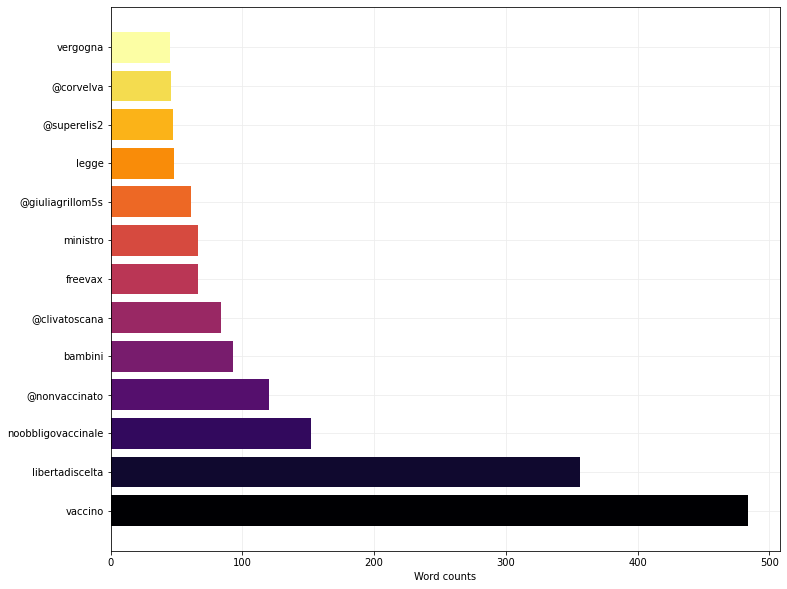

In [13]:
# Print most common word
#n_print = int(input("How many most common words to print: "))
#print("\nOK. The {} most common words are as follows\n".format(n_print))

n_print = 13

word_counter = collections.Counter(wordcount)
word_counter[''] = 0
word_counter['vaccino'] = word_counter['vaccini'] + word_counter['vaccino']
word_counter['vaccini'] = 0

#word_counter['vaccini'] = 'vaccino'

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)



lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])

fig, ax = plt.subplots(figsize=(12,10))
# Create bars
ax.barh(df['Word'], df['Count'],color=palette.inferno(n_print))
#plt.yticks(y_pos[:index], bars[:index])
ax.grid(True, which="both", ls="-",color='0.93')
ax.set_axisbelow(True)
ax.set_xlabel(r'Word counts')
plt.savefig("word_2017-2020.pdf",format='pdf',bbox_inches = "tight")